<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0622_MFK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install smt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smt: filename=smt-1.3.0-cp310-cp310-linux_x86_64.whl size=654483 sha256=423f0d1ef6b85bd50afcefc3eb9094733be4050b763f13bb6a40a49ceb1718f2
  Stored in directory: /root/.cache/pip/wheels/3b/d3/c7/5455cf3d853cb05d5b2e50ffc8085af8f2a31e15b4718a3bd9
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=5409f84ba7a9412ccad5dffd8df9d7a9cbbb35ea8d0d45a819b8fb1db90baa10
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built smt pyDOE2


In [ ]:
import numpy as np
from smt.sampling_methods import LHS
from smt.utils import compute_rms_error
from smt.applications import MFK
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
xH = pd.read_excel('xt_H_0619.xlsx', usecols=[1]).values
xL = pd.read_excel('xt_L_0619.xlsx', usecols=[1]).values

yH = pd.read_excel('mpmtrain_high_20.xlsx', usecols=[1]).values
yL = pd.read_excel('mpmtrain_low_40.xlsx', usecols=[1]).values



# Sample the test points using LHS
xlimits = np.array([[19.00, 21.00]])
sampling = LHS(xlimits=xlimits, criterion='ese', random_state=1)

test_num = 50
X_test = sampling(test_num)


# Fit the MFK model
sm = MFK(theta0=xH.shape[1] * [1.0], print_prediction=True)


sm.set_training_values(xH, yH)
# high-fidelity dataset without name
sm.set_training_values(xL, yL, name=0)


sm.train()

# Predict on the test points
y_pred= sm.predict_values(X_test)
mse = sm.predict_variances(X_test)
derivs = sm.predict_derivatives(X_test, kx=0)


___________________________________________________________________________
   
                                    MFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 20
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1324546
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 50
   
   Predicting ...
   Predicting - done. Time (sec):  0.0008898
   
   Prediction time/pt. (sec) :  0.0000178
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 50
   
   Predicting ...
   Predicting - done. Time (sec):  0.0007639
   
   Prediction time/pt. (sec) :  0.0000153
   


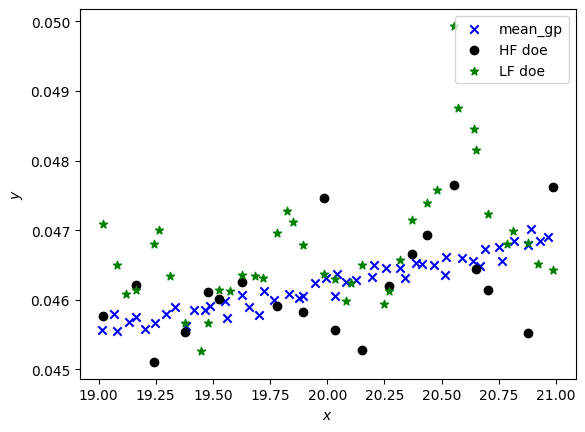

In [ ]:
plt.figure()

#plt.plot(X_test, y_pred, label="reference")
plt.scatter(X_test, y_pred, marker="x",color="b", label="mean_gp")
plt.scatter(xH, yH, marker="o", color="k", label="HF doe")
plt.scatter(xL, yL, marker="*", color="g", label="LF doe")

plt.legend(loc=0)
#plt.ylim(-10, 17)
#plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [ ]:
print(X_test)
print(y_pred)

[[19.20369354]
 [20.96520114]
 [19.38155267]
 [19.89253697]
 [20.34132661]
 [19.65669219]
 [20.04340177]
 [19.5551247 ]
 [20.25684431]
 [20.46746004]
 [20.41262063]
 [19.9476929 ]
 [20.1951257 ]
 [19.16587024]
 [20.08156219]
 [20.66992663]
 [20.87634382]
 [20.81791574]
 [20.89174457]
 [19.46740878]
 [19.48817809]
 [20.69121776]
 [20.59000577]
 [19.87873046]
 [19.83202978]
 [19.24745041]
 [19.06881298]
 [20.76412904]
 [19.01668088]
 [19.1320933 ]
 [20.93151101]
 [19.70234759]
 [19.72561548]
 [20.63955444]
 [19.5610955 ]
 [19.41676778]
 [20.75157117]
 [20.12679322]
 [19.29382243]
 [19.08000457]
 [20.03578427]
 [19.6268187 ]
 [19.99505557]
 [20.20393387]
 [20.38767508]
 [20.31831558]
 [19.3358707 ]
 [20.52073153]
 [19.76792406]
 [20.51338503]]
[[0.04558045]
 [0.04690043]
 [0.0456226 ]
 [0.04605563]
 [0.04631282]
 [0.04588999]
 [0.04637666]
 [0.04597727]
 [0.04646098]
 [0.04649804]
 [0.04651762]
 [0.04624637]
 [0.04633112]
 [0.04574989]
 [0.0462549 ]
 [0.04648103]
 [0.04679015]
 [0.0468501

In [ ]:
import pandas as pd

In [ ]:
dftrain = pd.DataFrame(X_test)
dftrain.to_excel('mpm_xtestdata_0622.xlsx', sheet_name='xtrain_sheet')

In [ ]:
y_real = pd.read_excel('mpmtestdata_0622.xlsx', usecols=[1]).values
print(y_real)

[[0.04563615]
 [0.04607022]
 [0.04606842]]


In [ ]:
#mesh low로 구했을때의 정확도? 비율?
yP = y_pred/y_real
print(yP)

[[0.99242008]
 [0.98849714]
 [0.99067566]]
